In [1]:
import time
from matplotlib import pyplot as plt
import numpy as np
import mxnet as mx
from mxnet import autograd, gluon
import gluoncv as gcv
from gluoncv.utils import download, viz

/home/kate/.local/lib/python3.8/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.10.2+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [2]:
import os

In [3]:
base_path = '/home/kate/PycharmProjects/image_prediction/images/'
#test_dir = '../input/intel-image-classification/seg_test/seg_test/'

In [4]:
folders = os.listdir(base_path)

In [5]:
print(folders)

['seg_train', 'seg_test', 'seg_pred']


In [6]:
base_path+folders[0]+'/'

'/home/kate/PycharmProjects/image_prediction/images/seg_train/'

In [7]:
train_folders = os.listdir(os.path.join(base_path,folders[0]))

In [8]:
print(f'train_folders: {train_folders}')

train_folders: ['sea', 'glacier', 'forest', 'mountain', 'buildings', 'street']


In [9]:
print('----Train Data Distribution-----')
print(f'Folder Name : No. of Images')
for folder in train_folders:
    print(f'{folder:11} : {len(os.listdir(os.path.join(base_path,folders[0],folder)))}')

----Train Data Distribution-----
Folder Name : No. of Images
sea         : 2274
glacier     : 2404
forest      : 2271
mountain    : 2512
buildings   : 2191
street      : 2382


In [10]:
val_folders = os.listdir(os.path.join(base_path,folders[1]))
print(f'val_folders: {val_folders}')

val_folders: ['sea', 'glacier', 'forest', 'mountain', 'buildings', 'street']


In [11]:
print('----Val Data Distribution-----')
print(f'Folder Name : No. of Images')
for folder in val_folders:
    print(f'{folder:11} : {len(os.listdir(os.path.join(base_path,folders[1],folder)))}')

----Val Data Distribution-----
Folder Name : No. of Images
sea         : 510
glacier     : 553
forest      : 474
mountain    : 525
buildings   : 437
street      : 501


In [12]:
test_images = os.listdir(os.path.join(base_path,folders[2]))
print(f'test_images: {len(test_images)}')
print('First ten Images')
print(test_images[:10])

test_images: 7301
First ten Images
['21326.jpg', '5803.jpg', '12901.jpg', '7943.jpg', '677.jpg', '22049.jpg', '12033.jpg', '10434.jpg', '5229.jpg', '19065.jpg']


In [13]:
import pandas as pd

In [14]:
df_train = pd.DataFrame(columns =['Names'])

In [15]:
df_train

,Names


In [16]:
for i in range(len(train_folders)):
    folder = train_folders[i]
    a = os.listdir(os.path.join(base_path,folders[0],folder))
    df = pd.DataFrame(a, columns =['Names'])
    df = df.assign(Folder_Name = folder)
    data = pd.concat([df_train, df], ignore_index=True)
    df_train = data
        

In [17]:
df_train

,Names,Folder_Name
0,14541.jpg,sea
1,1543.jpg,sea
2,19360.jpg,sea
3,11382.jpg,sea
4,10177.jpg,sea
...,...,...
14029,11113.jpg,street
14030,1618.jpg,street
14031,14839.jpg,street
14032,3911.jpg,street


In [18]:
df_train['Folder_Name'].unique()

array(['sea', 'glacier', 'forest', 'mountain', 'buildings', 'street'],
      dtype=object)

In [19]:
df_train['Names']

0        14541.jpg
1         1543.jpg
2        19360.jpg
3        11382.jpg
4        10177.jpg
           ...    
14029    11113.jpg
14030     1618.jpg
14031    14839.jpg
14032     3911.jpg
14033     1091.jpg
Name: Names, Length: 14034, dtype: object

In [20]:
folders

['seg_train', 'seg_test', 'seg_pred']

In [21]:
base_path+folders[0]+'/'+df_train['Folder_Name']

0        /home/kate/PycharmProjects/image_prediction/im...
1        /home/kate/PycharmProjects/image_prediction/im...
2        /home/kate/PycharmProjects/image_prediction/im...
3        /home/kate/PycharmProjects/image_prediction/im...
4        /home/kate/PycharmProjects/image_prediction/im...
                               ...                        
14029    /home/kate/PycharmProjects/image_prediction/im...
14030    /home/kate/PycharmProjects/image_prediction/im...
14031    /home/kate/PycharmProjects/image_prediction/im...
14032    /home/kate/PycharmProjects/image_prediction/im...
14033    /home/kate/PycharmProjects/image_prediction/im...
Name: Folder_Name, Length: 14034, dtype: object

In [22]:
df_train['folder_for_file'] = base_path+folders[0]+'/'+ df_train['Folder_Name']+'/'+df_train['Names']


In [23]:
df_train

,Names,Folder_Name,folder_for_file
0,14541.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...
1,1543.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...
2,19360.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...
3,11382.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...
4,10177.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...
...,...,...,...
14029,11113.jpg,street,/home/kate/PycharmProjects/image_prediction/im...
14030,1618.jpg,street,/home/kate/PycharmProjects/image_prediction/im...
14031,14839.jpg,street,/home/kate/PycharmProjects/image_prediction/im...
14032,3911.jpg,street,/home/kate/PycharmProjects/image_prediction/im...


In [24]:
def custom_rating(folder):
    if folder == 'glacier':
        return (2)
    elif folder == 'sea':
        return (4)
    elif folder == 'buildings':
        return (0)
    elif folder == 'forest':
        return (1)
    elif folder == 'street':
        return (5)
    
    elif folder == 'mountain':
        return (3)
        
df_train['label'] = df_train.Folder_Name.apply(lambda x: custom_rating(x))

In [25]:
df_train

,Names,Folder_Name,folder_for_file,label
0,14541.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...,4
1,1543.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...,4
2,19360.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...,4
3,11382.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...,4
4,10177.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...,4
...,...,...,...,...
14029,11113.jpg,street,/home/kate/PycharmProjects/image_prediction/im...,5
14030,1618.jpg,street,/home/kate/PycharmProjects/image_prediction/im...,5
14031,14839.jpg,street,/home/kate/PycharmProjects/image_prediction/im...,5
14032,3911.jpg,street,/home/kate/PycharmProjects/image_prediction/im...,5


In [27]:
df_train.label[0]

4

In [28]:
df_train.folder_for_file[0]

'/home/kate/PycharmProjects/image_prediction/images/seg_train/sea/14541.jpg'

In [29]:
%matplotlib inline
import autogluon.core as ag
from autogluon.vision import ImageDataset
import pandas as pd

2022-06-14 12:03:03.156303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 12:03:03.156356: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [30]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory):
        if labels == 'glacier':
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels):
            image = cv2.imread(directory+labels+r'/'+image_file)
            image = cv2.resize(image,(150,150))
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462)

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

Images, Labels = get_images('/home/kate/PycharmProjects/image_prediction/images/seg_train/')

Images = np.array(Images)
Labels = np.array(Labels)

plt.figure(figsize=(16,9))
for i in range(0, 9):
    plt.subplot(3,3,i+1)
    plt.imshow(Images[i])
    plt.title(get_classlabel(Labels[i]))
plt.tight_layout()

In [31]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor, ImageDataset

In [32]:
train_dataset = df_train[['folder_for_file','label']]

In [33]:
train_dataset

,folder_for_file,label
0,/home/kate/PycharmProjects/image_prediction/im...,4
1,/home/kate/PycharmProjects/image_prediction/im...,4
2,/home/kate/PycharmProjects/image_prediction/im...,4
3,/home/kate/PycharmProjects/image_prediction/im...,4
4,/home/kate/PycharmProjects/image_prediction/im...,4
...,...,...
14029,/home/kate/PycharmProjects/image_prediction/im...,5
14030,/home/kate/PycharmProjects/image_prediction/im...,5
14031,/home/kate/PycharmProjects/image_prediction/im...,5
14032,/home/kate/PycharmProjects/image_prediction/im...,5


In [34]:
train_dataset

,folder_for_file,label
0,/home/kate/PycharmProjects/image_prediction/im...,4
1,/home/kate/PycharmProjects/image_prediction/im...,4
2,/home/kate/PycharmProjects/image_prediction/im...,4
3,/home/kate/PycharmProjects/image_prediction/im...,4
4,/home/kate/PycharmProjects/image_prediction/im...,4
...,...,...
14029,/home/kate/PycharmProjects/image_prediction/im...,5
14030,/home/kate/PycharmProjects/image_prediction/im...,5
14031,/home/kate/PycharmProjects/image_prediction/im...,5
14032,/home/kate/PycharmProjects/image_prediction/im...,5


In [35]:
train_dataset = train_dataset.rename(columns={"folder_for_file": "image"})

In [36]:
predictor = ImagePredictor()

In [37]:
predictor.fit(train_dataset, hyperparameters={'epochs': 2})  # you can trust the default config, we reduce the # epoch to save some build time

`time_limit=auto` set to `time_limit=7200`.
Converting raw DataFrame to ImageDataset...
Detected 6 unique classes: [0, 1, 2, 3, 4, 5]
If you feel the `classes` is inaccurate, please construct the dataset explicitly, e.g. train_data = ImageDataset(train_data, classes=["foo", "bar"])
Randomly split train_data into train[12630]/validation[1404] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.misc.seed       42 != 709
root.misc.num_workers 4 != 12
root.train.epochs    200 != 2
root.train.early_stop_max_value 1.0 != inf
root.train.batch_size 32 != 16
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.img_cls.model   resnet101 != resnet50
}
Saved config to /home/kate/PycharmProjects/image_prediction/950a027b/.trial_0/config.yaml
Model resnet50 created, param count:                                         23520326
AMP not enabled. Trai

RuntimeError: Unexpected error happened during fit: { 'args': "{'img_cls': {'model': 'resnet50', 'pretrained': True, "
          "'global_pool_type': None}, 'data': {'img_size': None, 'input_size': "
          "None, 'crop_pct': 0.99, 'mean': None, 'std': None, 'interpolation': "
          "'', 'validation_batch_size_multiplier': 1}, 'optimizer': {'opt': "
          "'sgd', 'opt_eps': None, 'opt_betas': None, 'momentum': 0.9, "
          "'weight_decay': 0.0001, 'clip_grad': None, 'clip_mode': 'norm'}, "
          "'train': {'batch_size': 16, 'sched': 'step', 'lr': 0.01, "
          "'lr_noise': None, 'lr_noise_pct': 0.67, 'lr_noise_std': 1.0, "
          "'lr_cycle_mul': 1.0, 'lr_cycle_limit': 1, 'transfer_lr_mult': 0.01, "
          "'output_lr_mult': 0.1, 'warmup_lr': 0.0001, 'min_lr': 1e-05, "
          "'epochs': 2, 'start_epoch': 0, 'decay_epochs': 30, 'warmup_epochs': "
          "3, 'cooldown_epochs': 10, 'patience_epochs': 10, 'decay_rate': 0.1, "
          "'bn_momentum': None, 'bn_eps': None, 'sync_bn': False, "
          "'early_stop_patience': 10, 'early_stop_min_delta': 0.001, "
          "'early_stop_baseline': -inf, 'early_stop_max_value': inf}, "
          "'augmentation': {'no_aug': False, 'scale': (0.08, 1.0), 'ratio': "
          "(0.75, 1.3333333333333333), 'hflip': 0.5, 'vflip': 0.0, "
          "'color_jitter': 0.4, 'auto_augment': None, 'mixup': 0.0, 'cutmix': "
          "0.0, 'cutmix_minmax': None, 'mixup_prob': 1.0, 'mixup_switch_prob': "
          "0.5, 'mixup_mode': 'batch', 'mixup_off_epoch': 0, 'smoothing': 0.1, "
          "'train_interpolation': 'random', 'drop': 0.0, 'drop_path': None, "
          "'drop_block': None}, 'model_ema': {'model_ema': True, "
          "'model_ema_force_cpu': False, 'model_ema_decay': 0.9998}, 'misc': "
          "{'seed': 709, 'log_interval': 50, 'num_workers': 12, 'save_images': "
          "False, 'amp': False, 'apex_amp': False, 'native_amp': False, "
          "'pin_mem': False, 'prefetcher': False, 'eval_metric': 'top1', "
          "'tta': 0, 'use_multi_epochs_loader': False, 'torchscript': False}, "
          "'gpus': [0]}",
  'time': 18.153749227523804,
  'traceback': 'Traceback (most recent call last):\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/autogluon/vision/_gluoncv/image_classification.py", '
               'line 191, in _train_image_classification\n'
               '    result = estimator.fit(train_data=train_data, '
               'val_data=val_data, time_limit=wall_clock_tick-tic)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/gluoncv/auto/estimators/base_estimator.py", '
               'line 175, in fit\n'
               '    ret = self._fit(train_data, val_data, '
               'time_limit=time_limit) if not resume else \\\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/gluoncv/auto/estimators/torch_image_classification/torch_image_classification.py", '
               'line 123, in _fit\n'
               '    return self._resume_fit(train_data, val_data, '
               'time_limit=time_limit)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/gluoncv/auto/estimators/torch_image_classification/torch_image_classification.py", '
               'line 201, in _resume_fit\n'
               '    return self._train_loop(train_loader, val_loader, '
               'time_limit=time_limit)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/gluoncv/auto/estimators/torch_image_classification/torch_image_classification.py", '
               'line 239, in _train_loop\n'
               '    train_metrics = self.train_one_epoch(\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/gluoncv/auto/estimators/torch_image_classification/torch_image_classification.py", '
               'line 337, in train_one_epoch\n'
               '    output = net(input)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", '
               'line 1102, in _call_impl\n'
               '    return forward_call(*input, **kwargs)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/torch/nn/parallel/data_parallel.py", '
               'line 166, in forward\n'
               '    return self.module(*inputs[0], **kwargs[0])\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", '
               'line 1102, in _call_impl\n'
               '    return forward_call(*input, **kwargs)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/timm/models/resnet.py", '
               'line 685, in forward\n'
               '    x = self.forward_features(x)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/timm/models/resnet.py", '
               'line 679, in forward_features\n'
               '    x = self.layer2(x)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", '
               'line 1102, in _call_impl\n'
               '    return forward_call(*input, **kwargs)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/torch/nn/modules/container.py", '
               'line 141, in forward\n'
               '    input = module(input)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", '
               'line 1102, in _call_impl\n'
               '    return forward_call(*input, **kwargs)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/timm/models/resnet.py", '
               'line 410, in forward\n'
               '    x = self.bn2(x)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", '
               'line 1102, in _call_impl\n'
               '    return forward_call(*input, **kwargs)\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/torch/nn/modules/batchnorm.py", '
               'line 168, in forward\n'
               '    return F.batch_norm(\n'
               '  File '
               '"/home/kate/.local/lib/python3.8/site-packages/torch/nn/functional.py", '
               'line 2282, in batch_norm\n'
               '    return torch.batch_norm(\n'
               'RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB '
               '(GPU 0; 1.95 GiB total capacity; 789.73 MiB already allocated; '
               '9.88 MiB free; 822.00 MiB reserved in total by PyTorch) If '
               'reserved memory is >> allocated memory try setting '
               'max_split_size_mb to avoid fragmentation.  See documentation '
               'for Memory Management and PYTORCH_CUDA_ALLOC_CONF\n',
  'train_acc': -1,
  'valid_acc': -1}

In [38]:
model = ag.Categorical('resnet18_v1b', 'mobilenetv3_small')

In [39]:
batch_size = 8
lr = ag.Categorical(1e-2, 1e-3)

In [40]:
hyperparameters={'model': model, 'batch_size': batch_size, 'lr': lr, 'epochs': 2}

ImagePredictor sets accuracy as default eval_metric for classification problems.
Converting raw DataFrame to ImageDataset...
Detected 6 unique classes: [0, 1, 2, 3, 4, 5]
If you feel the `classes` is inaccurate, please construct the dataset explicitly, e.g. train_data = ImageDataset(train_data, classes=["foo", "bar"])
Randomly split train_data into train[12630]/validation[1404] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting HPO experiments


  0%|          | 0/2 [00:00<?, ?it/s]

In v0.5.0, ImagePredictor will no longer support training MXNet models. Please consider switching to specifying Torch models instead.
Users should ensure they update their code that depends on ImagePredictor when upgrading to future AutoGluon releases.
For more information, refer to this GitHub issue: https://github.com/awslabs/autogluon/issues/1560

modified configs(<old> != <new>): {
root.valid.batch_size 128 != 8
root.valid.num_workers 4 != 12
root.train.epochs    10 != 2
root.train.early_stop_max_value 1.0 != inf
root.train.num_workers 4 != 12
root.train.lr        0.1 != 0.01
root.train.data_dir  ~/.mxnet/datasets/imagenet != auto
root.train.num_training_samples 1281167 != -1
root.train.rec_train ~/.mxnet/datasets/imagenet/rec/train.rec != auto
root.train.rec_train_idx ~/.mxnet/datasets/imagenet/rec/train.idx != auto
root.train.rec_val_idx ~/.mxnet/datasets/imagenet/rec/val.idx != auto
root.train.batch_size 128 != 8
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_p

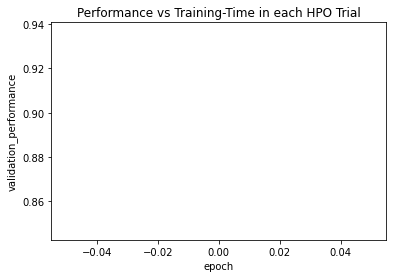

Finished, total runtime is 609.44 s
{ 'best_config': { 'estimator': <class 'gluoncv.auto.estimators.image_classification.image_classification.ImageClassificationEstimator'>,
                   'gpus': [0],
                   'img_cls': { 'batch_norm': False,
                                'last_gamma': False,
                                'model': 'resnet18_v1b',
                                'use_gn': False,
                                'use_pretrained': True,
                                'use_se': False},
                   'train': { 'batch_size': 8,
                              'crop_ratio': 0.875,
                              'data_dir': 'auto',
                              'dtype': 'float32',
                              'early_stop_baseline': -inf,
                              'early_stop_max_value': inf,
                              'early_stop_min_delta': 0.001,
                              'early_stop_patience': 10,
                              'epochs': 2,

Top-1 val acc: 0.892


In [41]:
hyperparameters={'model': model, 'batch_size': batch_size, 'lr': lr, 'epochs': 2}
predictor = ImagePredictor()
predictor.fit(train_dataset, time_limit=60*10, hyperparameters=hyperparameters,
              hyperparameter_tune_kwargs={'num_trials': 2})
print('Top-1 val acc: %.3f' % predictor.fit_summary()['valid_acc'])

In [42]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

Top-1 train acc: 0.775, val acc: 0.892


In [43]:
folders[2]

'seg_pred'

In [44]:
pred_images = os.listdir(os.path.join(base_path,folders[2]))

In [45]:
pred_images

['21326.jpg',
 '5803.jpg',
 '12901.jpg',
 '7943.jpg',
 '677.jpg',
 '22049.jpg',
 '12033.jpg',
 '10434.jpg',
 '5229.jpg',
 '19065.jpg',
 '17115.jpg',
 '13438.jpg',
 '16158.jpg',
 '5550.jpg',
 '16558.jpg',
 '9030.jpg',
 '10901.jpg',
 '1624.jpg',
 '23832.jpg',
 '9772.jpg',
 '11909.jpg',
 '9205.jpg',
 '15004.jpg',
 '4643.jpg',
 '5520.jpg',
 '21953.jpg',
 '4023.jpg',
 '16825.jpg',
 '7310.jpg',
 '22999.jpg',
 '22521.jpg',
 '507.jpg',
 '6229.jpg',
 '2278.jpg',
 '19393.jpg',
 '9264.jpg',
 '6892.jpg',
 '8971.jpg',
 '12635.jpg',
 '20823.jpg',
 '3408.jpg',
 '23034.jpg',
 '3772.jpg',
 '13807.jpg',
 '19941.jpg',
 '8597.jpg',
 '11022.jpg',
 '19376.jpg',
 '23994.jpg',
 '5945.jpg',
 '18608.jpg',
 '22605.jpg',
 '1376.jpg',
 '17804.jpg',
 '11170.jpg',
 '7869.jpg',
 '7663.jpg',
 '2376.jpg',
 '3833.jpg',
 '11778.jpg',
 '9168.jpg',
 '22492.jpg',
 '8154.jpg',
 '12960.jpg',
 '20103.jpg',
 '2146.jpg',
 '24289.jpg',
 '13199.jpg',
 '6.jpg',
 '4562.jpg',
 '8972.jpg',
 '8423.jpg',
 '22749.jpg',
 '9428.jpg',
 '135

In [46]:
df_pred = pd.DataFrame(pred_images, columns =['Names'])

In [47]:
df_pred

,Names
0,21326.jpg
1,5803.jpg
2,12901.jpg
3,7943.jpg
4,677.jpg
...,...
7296,14821.jpg
7297,10855.jpg
7298,4236.jpg
7299,13136.jpg


In [48]:
base_path+folders[2]+'/'+df_pred['Names']

0       /home/kate/PycharmProjects/image_prediction/im...
1       /home/kate/PycharmProjects/image_prediction/im...
2       /home/kate/PycharmProjects/image_prediction/im...
3       /home/kate/PycharmProjects/image_prediction/im...
4       /home/kate/PycharmProjects/image_prediction/im...
                              ...                        
7296    /home/kate/PycharmProjects/image_prediction/im...
7297    /home/kate/PycharmProjects/image_prediction/im...
7298    /home/kate/PycharmProjects/image_prediction/im...
7299    /home/kate/PycharmProjects/image_prediction/im...
7300    /home/kate/PycharmProjects/image_prediction/im...
Name: Names, Length: 7301, dtype: object

In [49]:
df_pred['image'] = base_path+folders[2]+'/'+df_pred['Names']

In [50]:
df_pred.image[0]

'/home/kate/PycharmProjects/image_prediction/images/seg_pred/21326.jpg'

In [51]:
result = predictor.predict(df_pred.image[0])

In [52]:
df_pred.image[1]

'/home/kate/PycharmProjects/image_prediction/images/seg_pred/5803.jpg'

In [53]:
result = predictor.predict(df_pred.image[1])

In [54]:
result

0    4
Name: label, dtype: int64

In [81]:
train_dataset, _, test_dataset = ImageDataset.from_folders('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
print(train_dataset)


data/
├── test/
└── train/
                                                 image  label
0    /home/kate/.gluoncv/datasets/shopee-iet/data/t...      0
1    /home/kate/.gluoncv/datasets/shopee-iet/data/t...      0
2    /home/kate/.gluoncv/datasets/shopee-iet/data/t...      0
3    /home/kate/.gluoncv/datasets/shopee-iet/data/t...      0
4    /home/kate/.gluoncv/datasets/shopee-iet/data/t...      0
..                                                 ...    ...
795  /home/kate/.gluoncv/datasets/shopee-iet/data/t...      3
796  /home/kate/.gluoncv/datasets/shopee-iet/data/t...      3
797  /home/kate/.gluoncv/datasets/shopee-iet/data/t...      3
798  /home/kate/.gluoncv/datasets/shopee-iet/data/t...      3
799  /home/kate/.gluoncv/datasets/shopee-iet/data/t...      3

[800 rows x 2 columns]


In [82]:
test_dataset

,image,label
0,/home/kate/.gluoncv/datasets/shopee-iet/data/t...,0
1,/home/kate/.gluoncv/datasets/shopee-iet/data/t...,0
2,/home/kate/.gluoncv/datasets/shopee-iet/data/t...,0
3,/home/kate/.gluoncv/datasets/shopee-iet/data/t...,0
4,/home/kate/.gluoncv/datasets/shopee-iet/data/t...,0
...,...,...
75,/home/kate/.gluoncv/datasets/shopee-iet/data/t...,3
76,/home/kate/.gluoncv/datasets/shopee-iet/data/t...,3
77,/home/kate/.gluoncv/datasets/shopee-iet/data/t...,3
78,/home/kate/.gluoncv/datasets/shopee-iet/data/t...,3


In [55]:
test_folders = os.listdir(os.path.join(base_path,folders[1]))

In [56]:
test_folders

['sea', 'glacier', 'forest', 'mountain', 'buildings', 'street']

In [57]:
#test_images = os.listdir(os.path.join(base_path,folders[1]))

In [58]:
df_test = pd.DataFrame(columns =['Names'])

In [59]:
for i in range(len(test_folders)):
    folder = test_folders[i]
    a = os.listdir(os.path.join(base_path,folders[1],folder))
    df = pd.DataFrame(a, columns =['Names'])
    df = df.assign(Folder_Name = folder)
    data = pd.concat([df_test, df], ignore_index=True)
    df_test = data
        

In [60]:
df_test

,Names,Folder_Name
0,20869.jpg,sea
1,24180.jpg,sea
2,20300.jpg,sea
3,21730.jpg,sea
4,20722.jpg,sea
...,...,...
2995,23155.jpg,street
2996,21062.jpg,street
2997,22786.jpg,street
2998,23586.jpg,street


In [61]:
df_test['folder_for_file'] = base_path+folders[1]+'/'+ df_test['Folder_Name']+'/'+df_test['Names']

In [62]:
df_test

,Names,Folder_Name,folder_for_file
0,20869.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...
1,24180.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...
2,20300.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...
3,21730.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...
4,20722.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...
...,...,...,...
2995,23155.jpg,street,/home/kate/PycharmProjects/image_prediction/im...
2996,21062.jpg,street,/home/kate/PycharmProjects/image_prediction/im...
2997,22786.jpg,street,/home/kate/PycharmProjects/image_prediction/im...
2998,23586.jpg,street,/home/kate/PycharmProjects/image_prediction/im...


In [63]:
def custom_rating(folder):
    if folder == 'glacier':
        return (2)
    elif folder == 'sea':
        return (4)
    elif folder == 'buildings':
        return (0)
    elif folder == 'forest':
        return (1)
    elif folder == 'street':
        return (5)
    
    elif folder == 'mountain':
        return (3)
        
df_test['label'] = df_test.Folder_Name.apply(lambda x: custom_rating(x))

In [64]:
df_test

,Names,Folder_Name,folder_for_file,label
0,20869.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...,4
1,24180.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...,4
2,20300.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...,4
3,21730.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...,4
4,20722.jpg,sea,/home/kate/PycharmProjects/image_prediction/im...,4
...,...,...,...,...
2995,23155.jpg,street,/home/kate/PycharmProjects/image_prediction/im...,5
2996,21062.jpg,street,/home/kate/PycharmProjects/image_prediction/im...,5
2997,22786.jpg,street,/home/kate/PycharmProjects/image_prediction/im...,5
2998,23586.jpg,street,/home/kate/PycharmProjects/image_prediction/im...,5


In [65]:
test_dataset = df_test[['folder_for_file','label']]

In [66]:
test_dataset

,folder_for_file,label
0,/home/kate/PycharmProjects/image_prediction/im...,4
1,/home/kate/PycharmProjects/image_prediction/im...,4
2,/home/kate/PycharmProjects/image_prediction/im...,4
3,/home/kate/PycharmProjects/image_prediction/im...,4
4,/home/kate/PycharmProjects/image_prediction/im...,4
...,...,...
2995,/home/kate/PycharmProjects/image_prediction/im...,5
2996,/home/kate/PycharmProjects/image_prediction/im...,5
2997,/home/kate/PycharmProjects/image_prediction/im...,5
2998,/home/kate/PycharmProjects/image_prediction/im...,5


In [67]:
test_dataset = test_dataset.rename(columns={"folder_for_file": "image"})

In [68]:
test_dataset

,image,label
0,/home/kate/PycharmProjects/image_prediction/im...,4
1,/home/kate/PycharmProjects/image_prediction/im...,4
2,/home/kate/PycharmProjects/image_prediction/im...,4
3,/home/kate/PycharmProjects/image_prediction/im...,4
4,/home/kate/PycharmProjects/image_prediction/im...,4
...,...,...
2995,/home/kate/PycharmProjects/image_prediction/im...,5
2996,/home/kate/PycharmProjects/image_prediction/im...,5
2997,/home/kate/PycharmProjects/image_prediction/im...,5
2998,/home/kate/PycharmProjects/image_prediction/im...,5


In [69]:
test_acc = predictor.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc['top1'])

Top-1 test acc: 0.889


image_path = test_dataset['image'] 
result = predictor.predict(image_path) # ValueError: Input is not supported: <class 'pandas.core.series.Series'>

In [70]:
a = []

In [71]:
for i in range(3000):
    image_path = test_dataset.iloc[i]['image']
    result = predictor.predict(image_path)
    a.append(result)

In [72]:
int(a[1])

4

In [78]:
int(a[2999])

5

In [73]:
for i in range(len(a)):
    a[i] = int(a[i])

In [77]:
len(a)

3000

In [79]:
a[2999]

5

In [80]:
test_dataset['predict'] = a

In [81]:
test_dataset

,image,label,predict
0,/home/kate/PycharmProjects/image_prediction/im...,4,4
1,/home/kate/PycharmProjects/image_prediction/im...,4,4
2,/home/kate/PycharmProjects/image_prediction/im...,4,4
3,/home/kate/PycharmProjects/image_prediction/im...,4,4
4,/home/kate/PycharmProjects/image_prediction/im...,4,4
...,...,...,...
2995,/home/kate/PycharmProjects/image_prediction/im...,5,5
2996,/home/kate/PycharmProjects/image_prediction/im...,5,5
2997,/home/kate/PycharmProjects/image_prediction/im...,5,5
2998,/home/kate/PycharmProjects/image_prediction/im...,5,5


#select GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"  # explicitly set to execute on CPU

In [ ]:
#Save and load classifiers

#You can directly save the instances of classifiers:

filename = 'predictor.ag'
predictor.save(filename)
predictor_loaded = ImagePredictor.load(filename)
# use predictor_loaded as usual
result = predictor_loaded.predict(image_path)
print(result)


In [82]:
from sklearn.utils import shuffle

In [83]:
shuffled_train_dataset = shuffle(train_dataset, random_state=1)

In [84]:
shuffled_train_dataset

,image,label
9306,/home/kate/PycharmProjects/image_prediction/im...,3
5299,/home/kate/PycharmProjects/image_prediction/im...,1
5725,/home/kate/PycharmProjects/image_prediction/im...,1
8912,/home/kate/PycharmProjects/image_prediction/im...,3
10406,/home/kate/PycharmProjects/image_prediction/im...,0
...,...,...
905,/home/kate/PycharmProjects/image_prediction/im...,4
5192,/home/kate/PycharmProjects/image_prediction/im...,1
12172,/home/kate/PycharmProjects/image_prediction/im...,5
235,/home/kate/PycharmProjects/image_prediction/im...,4


ImagePredictor sets accuracy as default eval_metric for classification problems.
Converting raw DataFrame to ImageDataset...
Detected 6 unique classes: [0, 1, 2, 3, 4, 5]
If you feel the `classes` is inaccurate, please construct the dataset explicitly, e.g. train_data = ImageDataset(train_data, classes=["foo", "bar"])
Randomly split train_data into train[12630]/validation[1404] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting HPO experiments


  0%|          | 0/2 [00:00<?, ?it/s]

In v0.5.0, ImagePredictor will no longer support training MXNet models. Please consider switching to specifying Torch models instead.
Users should ensure they update their code that depends on ImagePredictor when upgrading to future AutoGluon releases.
For more information, refer to this GitHub issue: https://github.com/awslabs/autogluon/issues/1560

modified configs(<old> != <new>): {
root.valid.batch_size 128 != 8
root.valid.num_workers 4 != 12
root.train.epochs    10 != 2
root.train.early_stop_max_value 1.0 != inf
root.train.num_workers 4 != 12
root.train.lr        0.1 != 0.01
root.train.data_dir  ~/.mxnet/datasets/imagenet != auto
root.train.num_training_samples 1281167 != -1
root.train.rec_train ~/.mxnet/datasets/imagenet/rec/train.rec != auto
root.train.rec_train_idx ~/.mxnet/datasets/imagenet/rec/train.idx != auto
root.train.rec_val_idx ~/.mxnet/datasets/imagenet/rec/val.idx != auto
root.train.batch_size 128 != 8
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_p

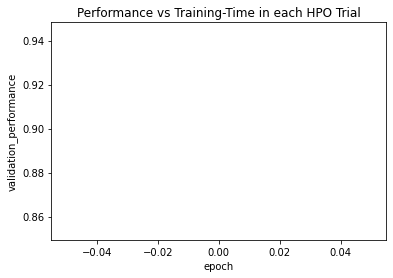

Finished, total runtime is 610.24 s
{ 'best_config': { 'estimator': <class 'gluoncv.auto.estimators.image_classification.image_classification.ImageClassificationEstimator'>,
                   'gpus': [0],
                   'img_cls': { 'batch_norm': False,
                                'last_gamma': False,
                                'model': 'resnet18_v1b',
                                'use_gn': False,
                                'use_pretrained': True,
                                'use_se': False},
                   'train': { 'batch_size': 8,
                              'crop_ratio': 0.875,
                              'data_dir': 'auto',
                              'dtype': 'float32',
                              'early_stop_baseline': -inf,
                              'early_stop_max_value': inf,
                              'early_stop_min_delta': 0.001,
                              'early_stop_patience': 10,
                              'epochs': 2,

Top-1 val acc: 0.899


In [85]:
hyperparameters={'model': model, 'batch_size': batch_size, 'lr': lr, 'epochs': 2}
predictor = ImagePredictor()
predictor.fit(shuffled_train_dataset, time_limit=60*10, hyperparameters=hyperparameters,
              hyperparameter_tune_kwargs={'num_trials': 2})
print('Top-1 val acc: %.3f' % predictor.fit_summary()['valid_acc'])

In [86]:
test_acc = predictor.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc['top1'])

Top-1 test acc: 0.902
